Exercise 1

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

You have historical data from previous applicants that you can use as a training set for logistic regression.
For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [6]:
X_train, y_train = load_data("ex2data1.txt")

In [7]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [8]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


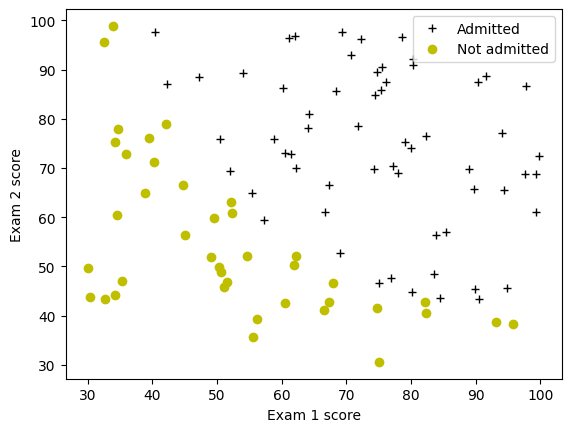

In [9]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc ='upper right')
plt.show()

In [10]:
#sigmoid function
import numpy as np
def sigmoid(z):
   g = 1/(1+np.exp(-z))
   return g

In [12]:
value =0
print(sigmoid(value))
print(f"signmoid value({value})={sigmoid(value)}")

0.5
signmoid value(0)=0.5


In [29]:
#Compute cost

import numpy as np
def compute_cost(X,y,w,b,*argv):
  m,n =X.shape
  total_cost =0
  for i in range(m):
    f_wb = np.dot(w ,X[i]) +b
    z = sigmoid(f_wb)
    loss = (-y[i] * np.log(z)) -(1-y[i]) * np.log(1-z)

    total_cost +=loss
  total_cost = total_cost/m
  return total_cost



In [30]:
m, n = X_train.shape
import numpy as np

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(float(cost)))

Cost at initial w and b (zeros): 0.693


In [41]:
def compute_cost_test(compute_cost):
    # Dummy test data for validation
    X_test = np.array([[1, 2], [3, 4], [5, 6]])  # 3 samples, 2 features
    y_test = np.array([0, 1, 0])  # Labels for the test set
    w_test = np.array([0.2, 0.3])  # Weights
    b_test = 0.5  # Bias

    # Compute cost using the test data
    cost = compute_cost(X_test, y_test, w_test, b_test)

    # Simple check, adjust based on expected results
    assert cost >= 0, f"Test failed! Cost should be non-negative, but got {cost}"
    print('all test passed')

In [42]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)

Cost at test w and b (non-zeros): 0.218
all test passed


In [44]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
import numpy as np
def compute_gradient(X, y, w, b, *argv):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ###
    for i in range(m):
        z_wb =0
        z_cal = np.dot(w,X[i])+b
        z_cal =sigmoid(z_cal)
        err = z_cal -y[i]
        dj_db += err


        for j in range(n):
            dj_dw[j] += err * X[i][j]

    dj_dw = dj_dw /m
    dj_db =  dj_db/m
    ### END CODE HERE ###


    return dj_db, dj_dw

In [45]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [47]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS
def compute_gradient_test(compute_gradient):
    # Dummy test data for validation
    X_test = np.array([[1, 2], [3, 4], [5, 6]])  # 3 samples, 2 features
    y_test = np.array([0, 1, 0])  # Labels for the test set
    w_test = np.array([0.2, 0.3])  # Weights
    b_test = 0.5  # Bias

    # Compute gradients using the test data
    dj_db, dj_dw = compute_gradient(X_test, y_test, w_test, b_test)

    # Simple check for gradients being finite numbers
    assert np.isfinite(dj_db).all(), f"Test failed! dj_db contains non-finite values."
    assert np.isfinite(dj_dw).all(), f"Test failed! dj_dw contains non-finite values."

    print(f"All tests passed! dj_db: {dj_db}, dj_dw: {dj_dw}")
compute_gradient_test(compute_gradient)

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]
All tests passed! dj_db: 0.5530469442516888, dj_dw: [1.77820338 2.33125033]


In [48]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [49]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


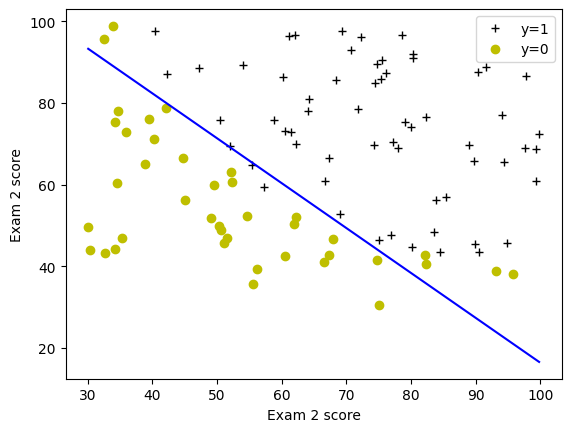

In [50]:
plot_decision_boundary(w,b,X_train, y_train)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 2 score')
plt.legend(loc ='upper right')
plt.show()

In [51]:
def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = np.dot(w,X[i])+ b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb >=0.5 else 0


    ### END CODE HERE ###
    return p

In [52]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2) #two elements
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5 # generate 4x2 matrix

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS
def predict_test(predict):
    # Test data
    X_test = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8]])
    w_test = np.array([0.2, -0.5])  # Some test weights
    b_test = 0.1  # Some test bias

    # Expected outcome should be based on computed sigmoid values
    p_test = predict(X_test, w_test, b_test)

    # Check if the output is a numpy array of shape (4,) and of integers (0 or 1)
    assert p_test.shape == (4,), f"Test failed! Expected shape (4,) but got {p_test.shape}"
    assert np.all(np.isin(p_test, [0, 1])), f"Test failed! Expected binary predictions, got {p_test}"

    print(f"All tests passed! Predicted values: {p_test}")

predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed! Predicted values: [1. 0. 0. 0.]


In [54]:
p = predict (X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


#Exercise 2

In [55]:
# load dataset
X_train, y_train = load_data("ex2data2.txt")

In [ ]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))


In [56]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))


The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


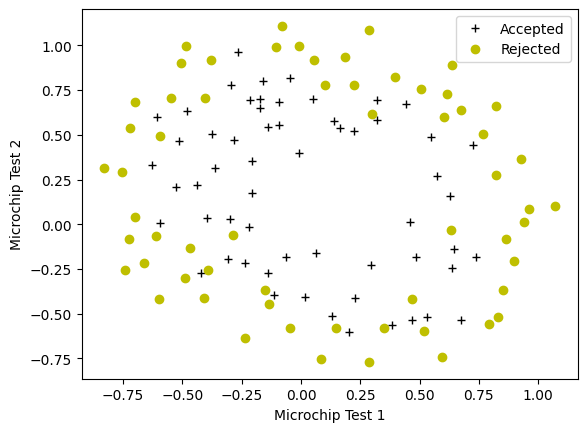

In [57]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

In [58]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1]) # a function of utils
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [59]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [60]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost
    """

    m, n = X.shape

    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)

    # You need to calculate this value
    reg_cost = 0.

    ### START CODE HERE ###
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))


    ### END CODE HERE ###

    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [63]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)



Regularized cost : 0.6618252552483948


In [68]:
def compute_gradient_reg(X,y,w,b,lamda_ =1):
    m,n = X.shape

    dj_db = 0.
    dj_dw = np.zeros(w.shape)

    for i in range(m):
        z_i = sigmoid(np.dot(X[i], w) + b)
        error = z_i - y[i]
        dj_db += error
        dj_dw += error * X[i]

    dj_db /= m
    dj_dw = dj_dw / m + (lambda_ / m) * w  # Add regularization term to weights

    return dj_db, dj_dw

In [69]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )



dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]


In [70]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) -0.5
initial_b = 1

lamda_ = 0.01
iter =10000
alpha = 0.01
w,b, J_history, _ = gradient_descent (X_mapped, y_train, initial_w,initial_b,compute_cost_reg,compute_gradient_reg,alpha,iter,lamda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.54   
Iteration 4000: Cost     0.52   
Iteration 5000: Cost     0.51   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.49   
Iteration 8000: Cost     0.48   
Iteration 9000: Cost     0.47   
Iteration 9999: Cost     0.47   


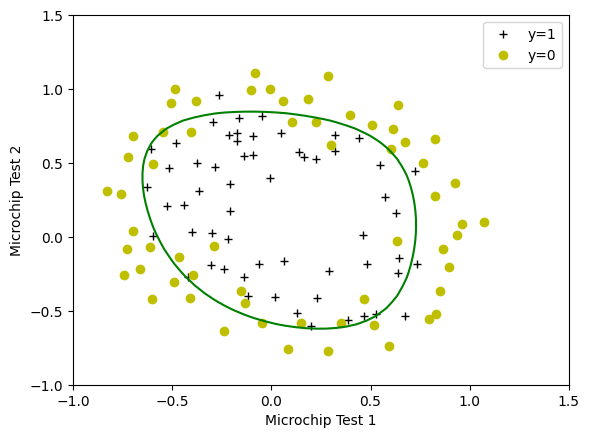

In [71]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

In [73]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))


Train Accuracy: 83.050847
